# CS530 - Principles of AI 
### Roshan Patel
Assignment 1  
2017-10-03


In [1]:
import sys
ver_info = sys.version
print("This jupyter notebook was executed with:\n{0}".format(ver_info));

This jupyter notebook was executed with:
3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


## Problem Statement

Solve the following discrimination problem analytically and then write a program to input 100 data points sampled from each class distribution (using a random number generator), classifying them,  and computing the empirical error rate for each class, together with the average error rate for both classes using 
1. the training sample as the testing sample; and then using   
2. a leaving-one-out method comparing the following types of classifiers:  
    a. Naive Bayesian Classifier  
    b) One layer ANN

Two features:  N(mean,variance) = Normal distribution of variable with mean and variance as indicated for the specified parameters

P(x<sub>1</sub> | w<sub>1</sub>) = N (0, 1)

P(x<sub>1</sub> | w<sub>2</sub>) = N (1, 2)

P(x<sub>2</sub> | w<sub>1</sub>) = N (0,1)

P(x<sub>2</sub> | w<sub>2</sub>) = N (1, 2)

Under three very different assumptions about the prior probabilities of w1 and w2:

A. Class 1 P(w<sub>1</sub>)  = 0.9 and Class 2 P(w<sub>2</sub>) = 0.1  
B. Class 1 P(w<sub>1</sub>) =  0.1 and Class 2 P(w<sub>2</sub>) = 0.9  
C. Class 1 P(w<sub>1</sub>) = 0.5 and Class 2 P(w<sub>2</sub>) = 0.5  


Graph the analytic solution and superimpose for both discriminants the results for the 200 points of both classes so as to show the differences in results for the two types of classifiers and the three variations in prior probabilities. Plot the error rate estimates for both types of estimates for the three types of error rates (individual classes and average) separately so as to show the contrasts there.

Choose carefully how you summarize both graphically and in writing the comparisons so as to show the contrast between the different results.

Explain in a long paragraph or half a page what this simple analytical example demonstrates for practical prediction problems

 



---

## Sample distribution  

A sample distribution of 200 points (100 per class) will be generated using the numpy.random package's uniform distribution sampler. 

In [2]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
SAMPLE_SET_SIZE = 200;

mu = [0, 1, 0, 1]
variance = [1, 2, 1, 2]
uniform_rands = [np.zeros(4)]*4

for i in range(4):
    uniform_rands[i] = np.random.normal(mu[i], variance[i], int(SAMPLE_SET_SIZE/2)) 

    
headers = "x1 x2 class".split()
class1 = pd.DataFrame({'x1': uniform_rands[0], 'x2': uniform_rands[2], 
                      'class': 'w1'}, columns=headers)
class2 = pd.DataFrame({'x1': uniform_rands[1], 'x2': uniform_rands[3], 
                      'class': 'w2'}, columns=headers)
class2.index=class2.index+int(SAMPLE_SET_SIZE/2)

sample_set = pd.concat([class1, class2])

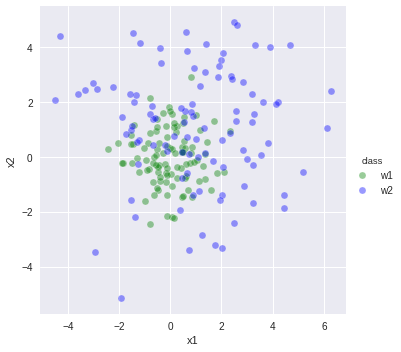

In [4]:
colors = {'w1':'green', 'w2':'blue'}
g = sns.FacetGrid(sample_set, hue='class', palette=colors, size=5)
g.map(plt.scatter,'x1', 'x2', alpha=0.4, linewidth=0.5, edgecolor='white')
g.add_legend()


The plot above shows the fake sampled data.  There are 200 points, half of which belong to class w1 and the other half belong to class w2.

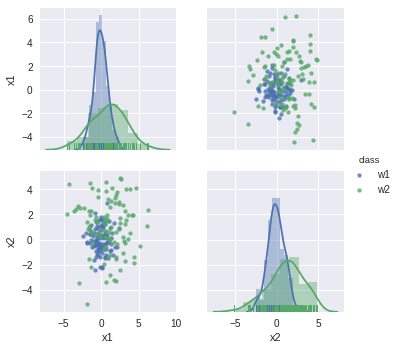

In [5]:
g = sns.PairGrid(sample_set, hue='class')
g.map_diag(sns.distplot, kde=True, rug=True)
g.map_offdiag(plt.scatter, alpha=0.8,s=15)
g.add_legend()             


As a sanity check, I verified the distribution of the fake sampled data visually in the plots above.  The diagonal shows histograms and density estimate functions for feature x1 in figure (1,1) and x2 in figure (2,2).  The estimate density function should roughly mimick the type of normal distributions specified in the problem statement.




# Naive Bayesian Classifier 

# Single Layer ANN

In [6]:
# Implementing single layer ANN class
# Simple perceptron learning rule using a unit-step function for each neuron's activation function 


class singleLayerANN(object):
    
    def __init__(self, learning_rate=0.01, cycles=50):
        self.learning_rate = learning_rate
        self.cycles = cycles
        
    def train_on_sample(self, X, w):
        
        self.weights = np.zeros(X.shape[1] + 1)
        self.error = []
        
#         incomplete... brb